In [2]:
# Importando bibliotecas para análise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import boxcox1p

py.init_notebook_mode(connected=True)

#Importando dados em CSV para um data frame
temperaturas = pd.read_csv('Temperaturas.csv')
slalom1 = pd.read_csv('RaceStudio_15_03_20_Noite_Slalom1_F19_Pedrao.csv')
slalom2 = pd.read_csv('RaceStudio_15_03_20_Noite_Slalom2_F19_Pedrao.csv')
slalom3 = pd.read_csv('RaceStudio_15_03_20_Noite_Slalom3_F19_Pedrao.csv')

In [3]:
slalom1.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc,Unnamed: 6
count,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,18552.000000,0.0
mean,463.775000,0.978507,3197.611238,11.235500,-0.009505,-0.000172,NaN
std,267.782271,0.922685,1597.348147,13.228421,0.215381,0.102341,NaN
min,0.000000,0.000000,0.000000,0.000000,-1.163522,-0.665645,NaN
25%,231.887500,0.025000,2207.688721,0.003456,-0.000077,0.000000,NaN
50%,463.775000,0.638000,2314.258911,8.077500,0.000000,0.000000,NaN
75%,695.662500,1.523000,3815.415039,18.700001,0.005169,0.004591,NaN
max,927.544000,2.897000,11040.164063,67.452003,1.069096,0.632110,NaN


In [4]:
slalom2.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc,Unnamed: 6
count,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,8585.000000,0.0
mean,214.599995,0.769527,3614.913192,15.787699,-0.012509,-0.000194,NaN
std,123.921010,0.685863,1943.820858,14.926866,0.258570,0.124048,NaN
min,0.000000,0.000000,0.000000,0.000000,-1.218440,-0.609669,NaN
25%,107.300000,0.117000,2239.618896,0.146000,-0.019540,-0.022434,NaN
50%,214.600000,0.627000,3052.438965,13.860001,0.000000,0.000000,NaN
75%,321.900000,1.484000,4291.229980,24.563000,0.028501,0.023976,NaN
max,429.158000,1.886000,11061.261719,68.503998,1.050741,0.671662,NaN


In [5]:
temperaturas.describe()

,Tempo,Temperatura
count,240.000000,240.000000
mean,120500.000000,60.626208
std,69426.219831,42.400970
min,1000.000000,-40.230000
25%,60750.000000,34.960000
50%,120500.000000,72.070000
75%,180250.000000,94.040000
max,240000.000000,124.800000


In [6]:
slalom3.describe()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc,Unnamed: 6
count,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,9406.000000,0.0
mean,235.124998,0.842297,3909.659285,17.032507,-0.010533,-0.000158,NaN
std,135.771130,0.685874,1949.897113,16.024242,0.286893,0.137369,NaN
min,0.000000,0.000000,0.000000,0.000000,-1.243939,-0.679182,NaN
25%,117.562500,0.305000,2284.366150,0.098000,-0.024199,-0.017253,NaN
50%,235.125000,0.623000,3328.958984,16.939999,0.000000,0.000000,NaN
75%,352.687500,1.423000,5120.356567,26.949750,0.037086,0.037883,NaN
max,470.235000,2.229000,10962.147461,70.944000,1.132471,0.608159,NaN


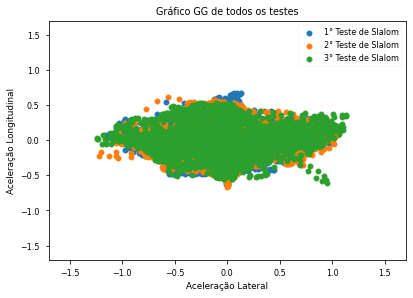

In [10]:
#Gráfico GG de aceleração longitudinal x aceleração lateral

slalom12 = slalom1[slalom1['RPM']>3000]
slalom22 = slalom2[slalom2['RPM']>3000]
slalom32 = slalom3[slalom3['RPM']>3000]

plt.scatter(slalom12['GPS_LatAcc'], slalom12['GPS_LonAcc']*-1, label="1° Teste de Slalom")
plt.scatter(slalom22['GPS_LatAcc'], slalom22['GPS_LonAcc']*-1, label="2° Teste de Slalom")
plt.scatter(slalom32['GPS_LatAcc'], slalom32['GPS_LonAcc']*-1, label="3° Teste de Slalom")
plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.title('Gráfico GG de todos os testes') #adicionando o título
plt.xlabel('Aceleração Lateral')
plt.ylabel('Aceleração Longitudinal')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('seaborn-paper')
plt.savefig('Gráfico GG de todos os testes.png')
#plt.show()

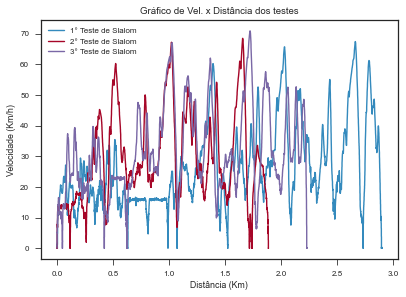

In [18]:
#Gráfico Velocidade x Distância

plt.plot(slalom1['Distance'], slalom1['GPS_Speed'], label="1° Teste de Slalom")
plt.plot(slalom2['Distance'], slalom2['GPS_Speed'], label="2° Teste de Slalom")
plt.plot(slalom3['Distance'], slalom3['GPS_Speed'], label="3° Teste de Slalom")
plt.title('Gráfico de Vel. x Distância dos testes') #adicionando o título
plt.xlabel('Distância (Km)')
plt.ylabel('Velocidade (Km/h)')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('seaborn-paper')
#plt.yticks(range(0, 54))
plt.savefig('Gráfico de velocidade x distância dos testes.png')
#plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

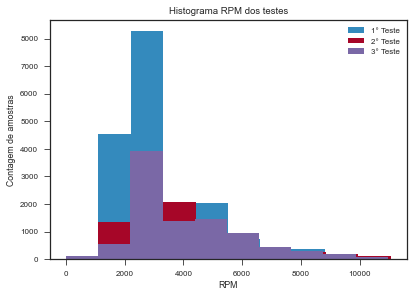

In [30]:
#Histograma de RPM

slalom1['RPM'].fillna(slalom1['RPM'].mean(), inplace=True)
plt.hist(slalom1['RPM'], bins = 10, label = "1° Teste")

slalom2['RPM'].fillna(slalom2['RPM'].mean(), inplace=True)
plt.hist(slalom2['RPM'], bins = 10, label = "2° Teste")

slalom3['RPM'].fillna(slalom3['RPM'].mean(), inplace=True)
plt.hist(slalom3['RPM'], bins = 10, label = "3° Teste")


plt.title('Histograma RPM dos testes')
plt.xlabel('RPM') 
plt.ylabel('Contagem de amostras')
plt.legend()
plt.show
#plt.savefig('Histograma RPM dos testes')

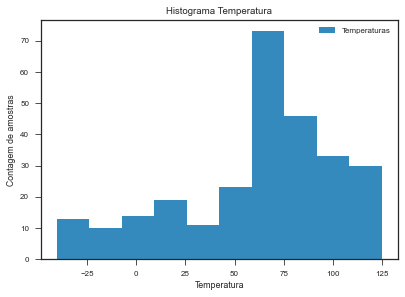

In [32]:
#Histograma de Temperatura

temperaturas['Temperatura'].fillna(temperaturas['Temperatura'].mean(), inplace=True)
plt.hist(temperaturas['Temperatura'], bins = 10, label = "Temperaturas")


plt.title('Histograma Temperatura')
plt.xlabel('Temperatura') 
plt.ylabel('Contagem de amostras')
plt.legend()
#plt.show
plt.savefig('Histograma Temperatura')

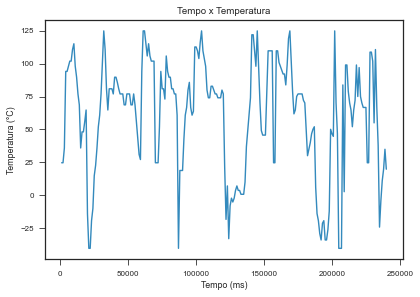

In [27]:
#Gráfico Tempo x Temperatura

plt.plot(temperaturas['Tempo'],temperaturas['Temperatura'])
plt.title('Tempo x Temperatura') #adicionando o título
plt.xlabel('Tempo (ms)')
plt.ylabel('Temperatura (°C)')
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('seaborn-paper')
#plt.yticks(range(0, 54))
plt.savefig('Gráfico de Tempo x Temperatura.png')
#plt.show()